<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [11]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [12]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [13]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [14]:
boston_df=pd.read_csv(boston_url)

In [6]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 2: Generate Descriptive Statistics and Visualizations

### For the "Median value of owner-occupied homes" provide a boxplot

Text(0.5, 1.0, 'Median value of owner-occupied homes')

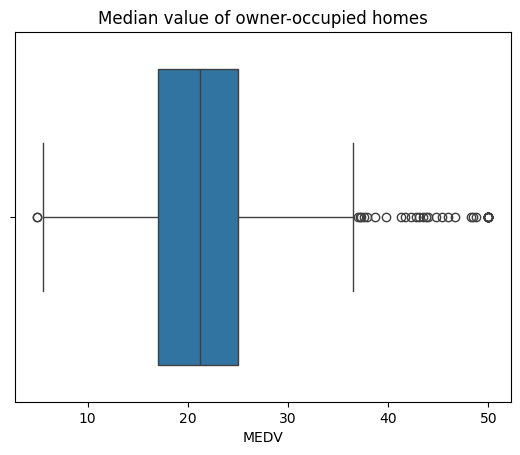

In [39]:
ax=sns.boxplot(x="MEDV", data=boston_df)
ax.set_title("Median value of owner-occupied homes")

The MEDV has many outliners and the mean is aporx 21-22 

### Provide a  bar plot for the Charles river variable

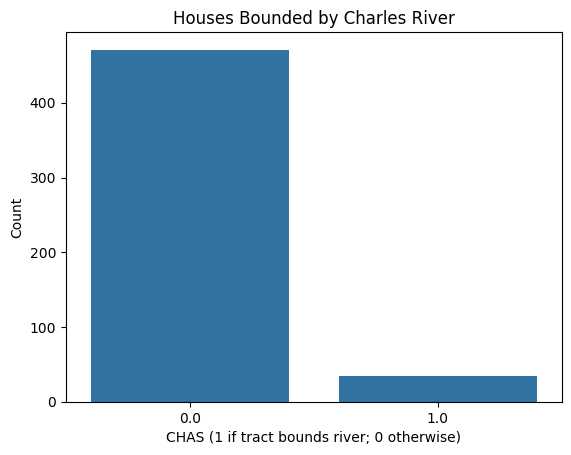

In [41]:
sns.countplot(x="CHAS", data=boston_df)
plt.title('Houses Bounded by Charles River')
plt.xlabel('CHAS (1 if tract bounds river; 0 otherwise)')
plt.ylabel('Count')
plt.show()

#### Houses that tract bound river are minority

### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [22]:
boston_df.loc[(boston_df['AGE'] <= 35), 'Age group'] = '35 and younger'
boston_df.loc[(boston_df["AGE"] > 35)&(boston_df['AGE'] < 70), 'Age group'] = '35 - 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age group'] = '70 and older'

Text(0.5, 1.0, ' MEDV vs AGE GROUP')

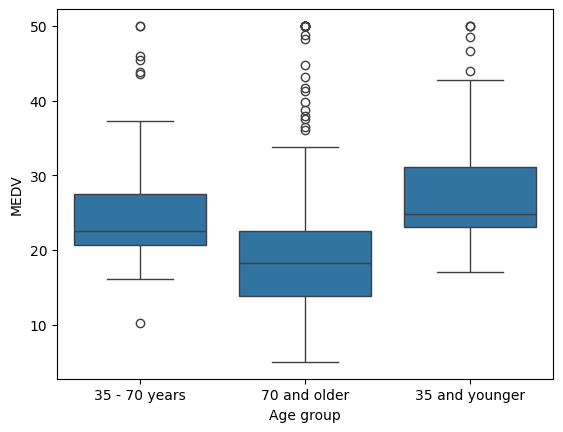

In [43]:
sns.boxplot(x="Age group", y="MEDV", data=boston_df)
ax.set_title(" MEDV vs AGE GROUP")

#### The means across the three age groups differ from each other by no more than 10.

### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0.5, 1.0, 'Relationship between NOX and INDUS')

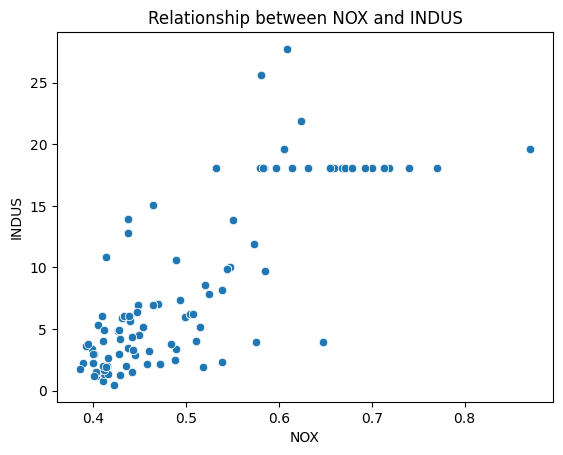

In [45]:
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)
ax.set_title("Relationship between NOX and INDUS")

#### There is a positive relationship between NOX and INDUS, you can see that when NOX increase, INDUS also increase, at a point it seems to stabilize.

### Create a histogram for the pupil to teacher ratio variable

Text(0.5, 1.0, 'Distribution of pupil to teacher ratio variable')

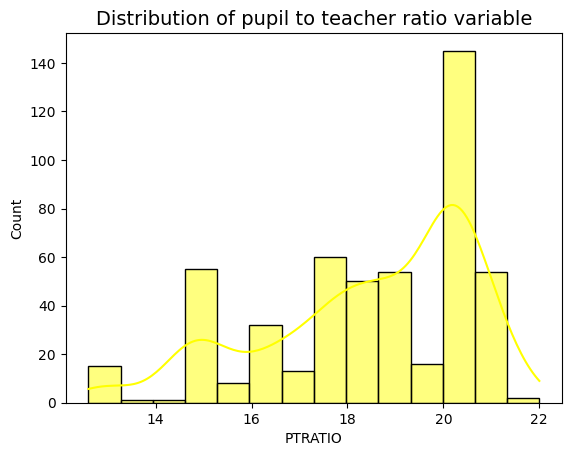

In [47]:
sns.histplot(data=boston_df, x='PTRATIO', kde=True, color='yellow')
plt.title('Distribution of pupil to teacher ratio variable',fontsize=14)

#### There is a large data set close to 20 and several smaller data sets, close to 60.

# TASK 3

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

+ $H_0: µ_1= µ_2$ There is NO difference in the median value of houses bounded by the Charles River and those not bordered by it.

+ $H_a: µ_1 ≠ µ_2$ There is a difference in the median value of houses bounded by the Charles River and those not bordered by it.

In [15]:
scipy.stats.ttest_ind(boston_df[boston_df["CHAS"]==0]["MEDV"],boston_df[boston_df["CHAS"]==1]["MEDV"],equal_var=False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

#### There is a significant difference because p-value<0.05, we reject th enull hypothesis.

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

+ $H_0: µ_1= µ_2= µ_3$ (the three population means are equal)


+ $H_a: $ At least one of the means differ

In [24]:
group1 = boston_df[boston_df['Age group'] == '35 and younger']['MEDV']
group2 = boston_df[boston_df['Age group'] == '35 - 70 years']['MEDV']
group3 = boston_df[boston_df['Age group'] == '70 and older']['MEDV']

In [25]:
f_stat, p_val = scipy.stats.f_oneway(group1, group2, group3)
print("F statistic: {}, P-value: {}".format(f_stat,p_val))

F statistic: 36.40764999196599, P-value: 1.7105011022702984e-15


#### P-value<0.05, that means the null hypothesis fails, so, there ir a diferrence in MEDV for each proportion of owner.

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

+ $H_0: $ There is NO relationship between Nitric oxide concentrations and proportion of non-retail business acres per town. 


+ $H_a: $ There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [29]:
scipy.stats.pearsonr(boston_df["NOX"],boston_df["INDUS"])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

#### since P-value<0.05 the null hyphotesis is rejected and conclude that there ir a relationship between Nitric concentrations and proportion of non-retrail business acres per town, that relationship is strong becasuse the pearson coefficient is 0.7 almost 1.

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [ ]:
 The DIS coefficient is equal to 0 (no impact).
 The DIS coefficient is different from 0 (there is an impact).

In [31]:
x=boston_df["DIS"]
y=boston_df["MEDV"]
x=sm.add_constant(x)

model = sm.OLS(y,x).fit()
predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 10 May 2025   Prob (F-statistic):           1.21e-08
Time:                        11:54:54   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Since p-value<0.05 there is a statistically effect on the average home value.